# Feature Subtractions

This includes reducing features using k-means clustering or other methods. 

In [1]:
# Load Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick
import sqlite3
import seaborn as sns
from matplotlib.pyplot import figure
from bs4 import BeautifulSoup
import time
import requests     # to get images
import shutil       # to save files locally
import datetime
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
from random import randint
import  random
import os
os.chdir('/Users/travisroyce/Library/CloudStorage/OneDrive-Personal/Data Science/Personal_Projects/Sports/UFC_Prediction_V2')


from cmath import nan


In [2]:
fights = pd.read_csv('data/final/aggregates/Double_Fights_DF_V19.csv')

## Reduce Affiliations using K-Means Clustering

In [3]:
# check the different affiliations
all_affiliations = fights['A_Affiliation'].unique()

In [4]:
# aggregate data by affiliation, get mean and n for each affiliation
affiliation_means = fights.groupby('A_Affiliation').mean()

affiliation_means['fight_count'] = fights.groupby('A_Affiliation').size()

affiliation_means

,Unnamed: 0,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,B_Sig_strike_percent,A_Total_Strikes_land,...,B_Body_Length_to_Height_Ratio,Body_Length_to_Height_Ratio_Dif,A_Body_Length_to_Reach_Ratio,B_Body_Length_to_Reach_Ratio,Body_Length_to_Reach_Ratio_Dif,A_Body_Length_to_Leg_Reach_Ratio,B_Body_Length_to_Leg_Reach_Ratio,Body_Length_to_Leg_Reach_Ratio_Dif,Ruleset,fight_count
A_Affiliation,,,,,,,,,,,,,,,,,,,,,
10th Planet Austin,4512.000000,0.000000,0.500000,52.500000,131.000000,74.500000,150.000000,0.385000,0.480000,59.000000,...,0.433464,-0.033464,0.373333,0.423124,-0.049790,0.666667,0.765244,-0.098577,4.0,2
10th Planet Jiu Jitsu,4711.615385,0.153846,0.692308,21.615385,46.461538,24.692308,52.923077,0.507692,0.482308,30.384615,...,0.428889,-0.036997,0.374194,0.420130,-0.045936,0.644444,0.752928,-0.108484,4.0,13
10th Planet Jiu Jitsu Buena Park,4384.333333,0.000000,0.000000,47.333333,96.000000,52.333333,111.666667,0.476667,0.473333,64.333333,...,0.429993,-0.010638,0.412698,0.437735,-0.025037,0.722222,0.754386,-0.032164,4.0,3
10th Planet Jiu Jitsu Jacksonville,8917.000000,0.000000,0.000000,11.000000,29.000000,53.000000,89.000000,0.370000,0.590000,20.000000,...,0.426471,-0.004248,0.413043,0.432836,-0.019792,0.730769,0.743590,-0.012821,4.0,1
10th Planet Jiu Jitsu San Diego,5582.000000,0.000000,0.000000,32.000000,85.000000,58.500000,137.000000,0.395000,0.460000,66.000000,...,0.424173,-0.013320,0.389706,0.427355,-0.037650,0.697368,0.736660,-0.039291,4.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zen Jiu-Jitsu,8005.500000,0.000000,1.000000,7.500000,24.500000,25.500000,56.000000,0.355000,0.530000,11.000000,...,0.419757,0.008814,0.422535,0.404960,0.017575,0.750000,0.723647,0.026353,4.0,2
Zenith MMA,6143.000000,0.000000,0.000000,17.000000,54.000000,58.000000,101.000000,0.310000,0.570000,17.000000,...,0.428571,0.023483,0.464789,0.422535,0.042254,0.825000,0.750000,0.075000,4.0,1
Zugec Ultimate Martial Arts,6348.600000,0.000000,0.000000,52.000000,117.000000,41.000000,106.800000,0.458000,0.452000,89.200000,...,0.445963,-0.037963,0.398361,0.433116,-0.034755,0.689394,0.807283,-0.117889,4.0,5


For our K-Means Clustering, lets use:
- fight_count
- win?
- Dif_Kd
- Dif_Sig_strike_att
- Dif_Sig_strike_percent
- Dif_Ctrl_time_sec
- Dif_Sub_Attempts_att
- Dif_Sub_Success_Percent
- Dif_Leg_Strikes_att
- Dif_Head_Strikes_att
- Dif_Body_Strikes_att

In [5]:
df_cluster = affiliation_means[['fight_count', 'win?', 'Dif_Kd', 'Dif_Sig_strike_att', 'Dif_Sig_strike_percent', 'Dif_Ctrl_time_sec', 'Dif_Sub_Attempts_att', 'Dif_Sub_Success_Percent', 'Dif_Leg_Strikes_att', 'Dif_Head_Strikes_att', 'Dif_Body_Strikes_att']]
df_cluster

,fight_count,win?,Dif_Kd,Dif_Sig_strike_att,Dif_Sig_strike_percent,Dif_Ctrl_time_sec,Dif_Sub_Attempts_att,Dif_Sub_Success_Percent,Dif_Leg_Strikes_att,Dif_Head_Strikes_att,Dif_Body_Strikes_att
A_Affiliation,,,,,,,,,,,
10th Planet Austin,2,0.000000,-0.500000,-19.000000,-0.095000,-51.500000,0.0,0.0,-7.000000,-7.000000,-5.000000
10th Planet Jiu Jitsu,13,0.461538,-0.538462,-6.461538,0.025385,-0.923077,0.0,0.0,-2.076923,-12.307692,7.923077
10th Planet Jiu Jitsu Buena Park,3,0.000000,0.000000,-15.666667,0.003333,12.333333,0.0,0.0,2.000000,-18.000000,0.333333
10th Planet Jiu Jitsu Jacksonville,1,0.000000,0.000000,-60.000000,-0.220000,11.000000,0.0,0.0,-4.000000,-44.000000,-12.000000
10th Planet Jiu Jitsu San Diego,2,0.000000,0.000000,-52.000000,-0.065000,-26.000000,0.0,0.0,9.500000,-43.500000,-18.000000
...,...,...,...,...,...,...,...,...,...,...,...
Zen Jiu-Jitsu,2,0.000000,-1.000000,-31.500000,-0.175000,-40.500000,0.0,0.0,-2.500000,-26.500000,-2.500000
Zenith MMA,1,0.000000,0.000000,-47.000000,-0.260000,7.000000,0.0,0.0,-8.000000,-10.000000,-29.000000
Zugec Ultimate Martial Arts,5,0.200000,0.000000,10.200000,0.006000,16.400000,0.0,0.0,2.800000,6.200000,1.200000


Determine optimal number of Clusters

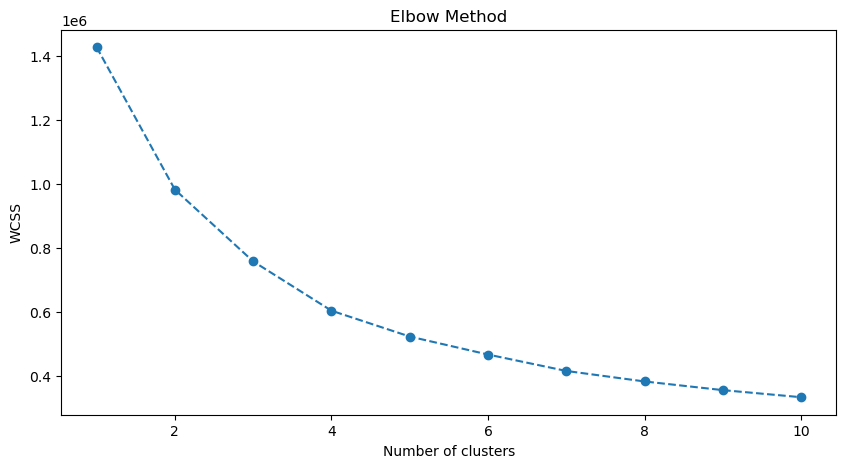

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []  # Within-Cluster-Sum-of-Squares 
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_cluster)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
# Apply k-means
optimal_clusters = 7  # Assuming 3 was the elbow point, adjust this based on your plot
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(df_cluster)

In [8]:
fights['A_Affiliation_Cluster'] = fights['A_Affiliation'].map(dict(zip(fights['A_Affiliation'].unique(), cluster_labels)))
fights['B_Affiliation_Cluster'] = fights['B_Affiliation'].map(dict(zip(fights['B_Affiliation'].unique(), cluster_labels)))

## Reduce Fighting_Out_Of using K-means clustering

In [9]:
# aggregate data by fighting_out_of, get mean and n for each fighting_out_of
fighting_out_of_means = fights.groupby('A_Fighting_Out_Of').mean()

fighting_out_of_means['fight_count'] = fights.groupby('A_Fighting_Out_Of').size()

fighting_out_of_means

,Unnamed: 0,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,B_Sig_strike_percent,A_Total_Strikes_land,...,A_Body_Length_to_Reach_Ratio,B_Body_Length_to_Reach_Ratio,Body_Length_to_Reach_Ratio_Dif,A_Body_Length_to_Leg_Reach_Ratio,B_Body_Length_to_Leg_Reach_Ratio,Body_Length_to_Leg_Reach_Ratio_Dif,Ruleset,A_Affiliation_Cluster,B_Affiliation_Cluster,fight_count
A_Fighting_Out_Of,,,,,,,,,,,,,,,,,,,,,
"Enumclaw, Washington, United States",1936.000000,0.000000,0.800000,34.800000,81.400000,40.800000,61.000000,0.460000,0.646000,69.000000,...,0.432432,0.410435,0.021997,0.780488,0.737937,0.042551,4.0,5.000000,1.400000,5
"Abertillery, Wales",4514.416667,0.250000,0.250000,37.083333,104.416667,36.000000,85.083333,0.360000,0.417500,47.000000,...,0.428018,0.413227,0.014791,0.785256,0.738498,0.046759,4.0,1.416667,1.916667,12
"Aktobe, Kazakhstan",5453.125000,0.000000,0.250000,40.125000,89.875000,41.375000,101.750000,0.413750,0.420000,55.250000,...,0.426944,0.417088,0.009856,0.780781,0.753418,0.027362,4.0,4.000000,1.875000,8
"Alabama, United States",4577.000000,2.000000,0.000000,51.000000,86.000000,7.000000,29.000000,0.590000,0.240000,51.000000,...,0.392857,0.426667,-0.033810,0.662651,0.820513,-0.157862,4.0,1.000000,6.000000,1
Alaska,3790.272727,0.454545,0.272727,49.545455,99.363636,51.272727,122.727273,0.513636,0.426364,58.818182,...,0.380645,0.399582,-0.018937,0.710843,0.712508,-0.001664,4.0,0.000000,1.272727,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Yokohama-shi, Kanagawa, Japan",7615.000000,0.000000,0.000000,15.000000,31.000000,70.000000,89.000000,0.480000,0.780000,27.000000,...,0.416667,0.418919,-0.002252,0.750000,0.738095,0.011905,4.0,0.000000,0.000000,1
"Yokosuka, Kanagawa, Japan",4592.333333,0.000000,0.333333,19.333333,44.666667,35.333333,71.666667,0.396667,0.463333,44.000000,...,0.420290,0.422271,-0.001981,0.763158,0.768180,-0.005022,4.0,0.000000,3.333333,3
"Yuma, Arizona",5695.250000,0.500000,0.062500,40.812500,96.000000,37.937500,89.187500,0.435625,0.411875,50.812500,...,0.415591,0.400385,0.015207,0.752840,0.710462,0.042378,4.0,1.000000,1.687500,16


K-means selections

In [10]:
df_cluster = fighting_out_of_means[['fight_count', 'win?', 'Dif_Kd', 'Dif_Sig_strike_att', 'Dif_Sig_strike_percent', 'Dif_Ctrl_time_sec', 'Dif_Sub_Attempts_att', 'Dif_Sub_Success_Percent', 'Dif_Leg_Strikes_att', 'Dif_Head_Strikes_att', 'Dif_Body_Strikes_att']]
df_cluster

,fight_count,win?,Dif_Kd,Dif_Sig_strike_att,Dif_Sig_strike_percent,Dif_Ctrl_time_sec,Dif_Sub_Attempts_att,Dif_Sub_Success_Percent,Dif_Leg_Strikes_att,Dif_Head_Strikes_att,Dif_Body_Strikes_att
A_Fighting_Out_Of,,,,,,,,,,,
"Enumclaw, Washington, United States",5,0.400000,-0.800000,20.400000,-0.186000,-6.000000,0.0,0.0,-2.400000,23.200000,-0.400000
"Abertillery, Wales",12,0.583333,0.000000,19.333333,-0.057500,-11.416667,0.0,0.0,2.500000,15.666667,1.166667
"Aktobe, Kazakhstan",8,0.500000,-0.250000,-11.875000,-0.006250,6.250000,0.0,0.0,-1.000000,-7.875000,-3.000000
"Alabama, United States",1,1.000000,2.000000,57.000000,0.350000,1.000000,0.0,0.0,4.000000,43.000000,10.000000
Alaska,11,0.636364,0.181818,-23.363636,0.087273,-15.363636,0.0,0.0,2.636364,-30.272727,4.272727
...,...,...,...,...,...,...,...,...,...,...,...
"Yokohama-shi, Kanagawa, Japan",1,0.000000,0.000000,-58.000000,-0.300000,39.000000,0.0,0.0,-5.000000,-32.000000,-21.000000
"Yokosuka, Kanagawa, Japan",3,0.000000,-0.333333,-27.000000,-0.066667,-11.333333,0.0,0.0,9.000000,-22.000000,-14.000000
"Yuma, Arizona",16,0.437500,0.437500,6.812500,0.023750,9.937500,0.0,0.0,0.125000,6.812500,-0.125000


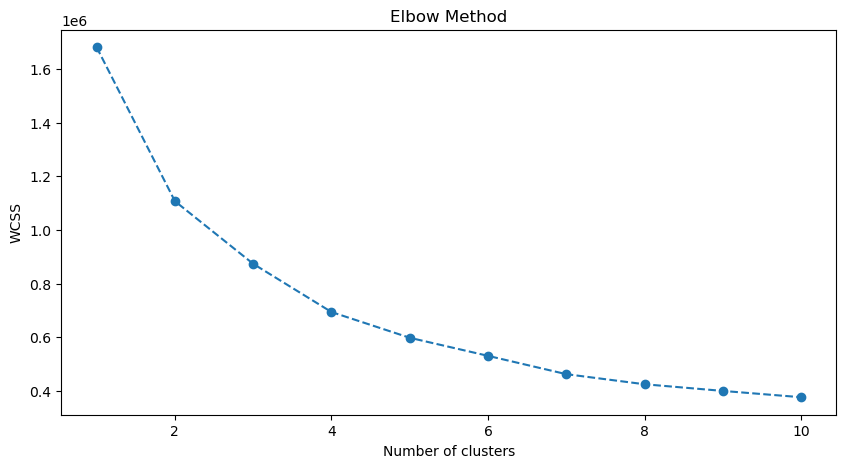

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []  # Within-Cluster-Sum-of-Squares 
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_cluster)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
# Apply k-means
optimal_clusters = 7  # Assuming 3 was the elbow point, adjust this based on your plot
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(df_cluster)

In [13]:
fights['A_Fighting_Out_Of_Cluster'] = fights['A_Fighting_Out_Of'].map(dict(zip(fights['A_Fighting_Out_Of'].unique(), cluster_labels)))
fights['B_Fighting_Out_Of_Cluster'] = fights['B_Fighting_Out_Of'].map(dict(zip(fights['B_Fighting_Out_Of'].unique(), cluster_labels)))

## Reduce Previous_Promotion using K-means clustering

In [14]:
all_previous_promotions = fights['A_Previous_Promotion'].unique()
print(len(all_previous_promotions))
all_previous_promotions

248


array(['PFL - Professional Fighters League', 'BFC - Bellator MMA', 'None',
       'ROC - Ring of Combat', 'SFC - Supremacy Fight Challenge',
       'WEC - World Extreme Cagefighting',
       'SRC - Sengoku Raiden Championship', 'XK - Xtreme Kombat',
       'M-1 - M-1 Global', 'CWFC - Cage Warriors Fighting Championship',
       'SC - Superior Challenge', 'XFC - Xtreme Fighting Championships',
       'PFC - Pride Fighting Championships', 'TKO - TKO Major League MMA',
       'UCMMA - Ultimate Challenge MMA',
       "DWCS - Dana White's Contender Series",
       'KSW - Konfrontacja Sztuk Walki', 'SB - Shooto Brasil',
       'EFX - Extreme Fighting Xtreme\t',
       'LFA - Legacy Fighting Alliance',
       'RMMA - Renaissance Mixed Martial Arts', 'ROF - Ring of Fire',
       'WCFC - West Coast Fighting Championship',
       'PFC - Pinnacle Fighting Championships', 'BAMMA - BAMMA',
       'JFC - Jungle Fight Championship', 'EXC - Elite Xtreme Combat',
       'SF - Strikeforce', 'WSOF - Worl

In [15]:
previous_promotion_means = fights.groupby('A_Previous_Promotion').mean()

previous_promotion_means['fight_count'] = fights.groupby('A_Previous_Promotion').size()

previous_promotion_means

,Unnamed: 0,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,B_Sig_strike_percent,A_Total_Strikes_land,...,Body_Length_to_Reach_Ratio_Dif,A_Body_Length_to_Leg_Reach_Ratio,B_Body_Length_to_Leg_Reach_Ratio,Body_Length_to_Leg_Reach_Ratio_Dif,Ruleset,A_Affiliation_Cluster,B_Affiliation_Cluster,A_Fighting_Out_Of_Cluster,B_Fighting_Out_Of_Cluster,fight_count
A_Previous_Promotion,,,,,,,,,,,,,,,,,,,,,
100% Fight,4189.529412,0.411765,0.000000,25.411765,65.176471,22.882353,47.411765,0.468824,0.455294,30.882353,...,-0.044208,0.690592,0.766147,-0.075555,4.0,0.176471,2.176471,4.000000,3.117647,17
300S - 300 Sparta,5672.800000,0.000000,0.600000,18.800000,41.200000,39.200000,74.600000,0.394000,0.578000,26.600000,...,0.008011,0.750000,0.740925,0.009075,4.0,6.000000,0.200000,4.000000,2.000000,5
ACA - Absolute Championship Akhmat,5150.607595,0.215190,0.177215,32.405063,74.278481,40.493671,88.911392,0.453671,0.449114,47.316456,...,0.002158,0.755272,0.741516,0.013755,4.0,2.265823,1.708861,3.151899,2.822785,79
ACB - Absolute Championship Berkut,4855.534247,0.219178,0.246575,38.239726,85.390411,39.287671,91.863014,0.459795,0.432603,55.678082,...,-9.583917,0.754870,0.745238,0.009633,4.0,1.575342,1.712329,3.006849,2.589041,146
AFC - ARES Fighting Championship,6439.833333,0.000000,0.166667,49.666667,146.000000,56.000000,121.833333,0.330000,0.443333,58.833333,...,0.038913,0.802469,0.745878,0.056592,4.0,1.000000,2.166667,1.000000,2.500000,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XFS - Xplode Fight Series,6847.000000,0.000000,0.000000,11.000000,15.000000,60.000000,85.000000,0.730000,0.700000,24.000000,...,0.023875,0.763158,0.662791,0.100367,4.0,1.000000,1.000000,1.000000,4.000000,1
XK - Xtreme Kombat,2033.333333,0.000000,0.000000,31.833333,70.000000,24.166667,60.666667,0.456667,0.405000,42.333333,...,-0.016650,0.670266,0.730397,-0.060131,4.0,0.000000,0.833333,2.500000,3.500000,6
XKK - Xtreme Kage Kombat,8635.000000,0.000000,0.000000,44.000000,102.000000,68.000000,137.000000,0.430000,0.490000,118.000000,...,0.000000,0.746835,0.746835,0.000000,4.0,0.000000,1.000000,5.000000,4.000000,1


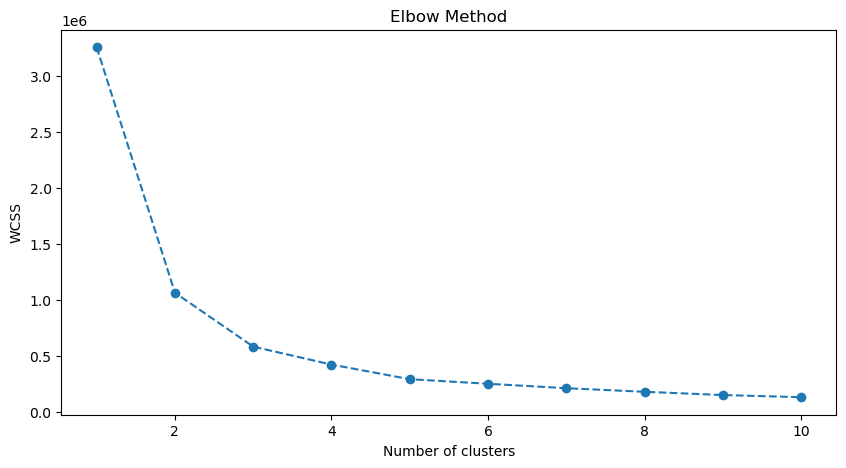

In [16]:
df_cluster = previous_promotion_means[['fight_count', 'win?', 'Dif_Kd', 'Dif_Sig_strike_att', 'Dif_Sig_strike_percent', 'Dif_Ctrl_time_sec', 'Dif_Sub_Attempts_att', 'Dif_Sub_Success_Percent', 'Dif_Leg_Strikes_att', 'Dif_Head_Strikes_att', 'Dif_Body_Strikes_att']]


wcss = []  # Within-Cluster-Sum-of-Squares 
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_cluster)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
# Apply k-means
optimal_clusters = 5  # Assuming 3 was the elbow point, adjust this based on your plot
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(df_cluster)

In [18]:
# apply back to fights
fights['A_Previous_Promotion_Cluster'] = fights['A_Previous_Promotion'].map(dict(zip(fights['A_Previous_Promotion'].unique(), cluster_labels)))
fights['B_Previous_Promotion_Cluster'] = fights['B_Previous_Promotion'].map(dict(zip(fights['B_Previous_Promotion'].unique(), cluster_labels)))

## Reduce Martial_Art_# using grouping

Many martial arts may just need to be cleaned up

In [19]:
# get martial arts columns and values
martial_arts_cols = [col for col in fights.columns if 'Martial' in col]
martial_arts_cols

['A_Martial_Art_1',
 'B_Martial_Art_1',
 'A_Martial_Art_Instructor_1',
 'B_Martial_Art_Instructor_1',
 'A_Martial_Art_Year_Started_1',
 'B_Martial_Art_Year_Started_1',
 'A_Martial_Art_2',
 'B_Martial_Art_2',
 'A_Martial_Art_Instructor_2',
 'B_Martial_Art_Instructor_2',
 'A_Martial_Art_Year_Started_2',
 'B_Martial_Art_Year_Started_2',
 'A_Martial_Art_3',
 'B_Martial_Art_3',
 'A_Martial_Art_Instructor_3',
 'B_Martial_Art_Instructor_3',
 'A_Martial_Art_Year_Started_3',
 'B_Martial_Art_Year_Started_3']

In [20]:
# get all unique values from A_Martial_Art_1, A_Martial_Art_2, and A_Martial_Art_3
all_martial_arts = fights['A_Martial_Art_1'].unique()
all_martial_arts = np.append(all_martial_arts, fights['A_Martial_Art_2'].unique())
all_martial_arts = np.append(all_martial_arts, fights['A_Martial_Art_3'].unique())
all_martial_arts = np.unique(all_martial_arts)

print(len(all_martial_arts))
all_martial_arts

65


array(["'Brazilian Jiu-Jitsu", "'Judo", "'Karate", "'Krav Maga",
       "'Muay Thai", '(nan, nan, nan)', 'Aikido', 'Amateur Wrestling',
       'BJJ', 'Bagua Zhang', 'Baguazhang', 'Boxing',
       'Brazilian Jiu Jitsu', 'Brazilian Jiu-Jitsu',
       'Brazilian Jiu-Jitsu 2004',
       'Brazilian Jiu-Jitsu 2011 Factory X Muay Thai', 'Capoeira',
       'Catch Wrestling', 'Combat Sambo', 'Freestyle Wrestling',
       'Hapkido', 'Iaido', 'Iaijutsu', 'Jiu-Jitsu', 'Judo', 'Judo 2001',
       'Judo 2005', 'Jujutsu', 'Kajukenbo', 'Karate', 'Karate 1984',
       'Kempo Karate', 'Kendo', 'Kickboxing', 'Kodokan Judo', 'Krav Maga',
       'Kumdo', 'Kung Fu', 'Kurash', 'Kyokushin Karate', 'MMA',
       'Mixed Martial Arts', 'Mongolian Wrestling', 'Muay Boran',
       'Muay Thai', 'Muay Thai 1988', 'Muay Thai 1998', 'Muay Thai 2000',
       'Muay Thai 2001', 'Muay Thai 2011 Factory X Muay Thai', 'Sambo',
       'Sanda', 'Sanshou', 'Savate', 'Savate 1991', 'Shooto',
       'Tae Kwon Do', 'Taekwondo', '

In [21]:
# search for each martial art that includes 'Jitsu' and replace with 'BJJ'
fights.loc[fights['A_Martial_Art_1'].str.contains('Jitsu', case=False, na=False), 'A_Martial_Art_1'] = 'BJJ'
fights.loc[fights['A_Martial_Art_2'].str.contains('Jitsu', case=False, na=False), 'A_Martial_Art_2'] = 'BJJ'
fights.loc[fights['A_Martial_Art_3'].str.contains('Jitsu', case=False, na=False), 'A_Martial_Art_3'] = 'BJJ'
fights.loc[fights['B_Martial_Art_1'].str.contains('Jitsu', case=False, na=False), 'B_Martial_Art_1'] = 'BJJ'
fights.loc[fights['B_Martial_Art_2'].str.contains('Jitsu', case=False, na=False), 'B_Martial_Art_2'] = 'BJJ'
fights.loc[fights['B_Martial_Art_3'].str.contains('Jitsu', case=False, na=False), 'B_Martial_Art_3'] = 'BJJ'



In [22]:
# search for each martial art that includes 'muay thai' and replace with 'Muay Thai'
fights.loc[fights['A_Martial_Art_1'].str.contains('Muay Thai', case=False, na=False), 'A_Martial_Art_1'] = 'Muay Thai'
fights.loc[fights['B_Martial_Art_1'].str.contains('Muay Thai', case=False, na=False), 'B_Martial_Art_1'] = 'Muay Thai'
fights.loc[fights['A_Martial_Art_2'].str.contains('Muay Thai', case=False, na=False), 'A_Martial_Art_2'] = 'Muay Thai'
fights.loc[fights['B_Martial_Art_2'].str.contains('Muay Thai', case=False, na=False), 'B_Martial_Art_2'] = 'Muay Thai'
fights.loc[fights['A_Martial_Art_3'].str.contains('Muay Thai', case=False, na=False), 'A_Martial_Art_3'] = 'Muay Thai'
fights.loc[fights['B_Martial_Art_3'].str.contains('Muay Thai', case=False, na=False), 'B_Martial_Art_3'] = 'Muay Thai'

In [23]:
# search for each martial art that includes 'Wrestling' and replace with 'Wrestling'
fights.loc[fights['A_Martial_Art_1'].str.contains('Wrestling', case=False, na=False), 'A_Martial_Art_1'] = 'Wrestling'
fights.loc[fights['B_Martial_Art_1'].str.contains('Wrestling', case=False, na=False), 'B_Martial_Art_1'] = 'Wrestling'
fights.loc[fights['A_Martial_Art_2'].str.contains('Wrestling', case=False, na=False), 'A_Martial_Art_2'] = 'Wrestling'
fights.loc[fights['B_Martial_Art_2'].str.contains('Wrestling', case=False, na=False), 'B_Martial_Art_2'] = 'Wrestling'
fights.loc[fights['A_Martial_Art_3'].str.contains('Wrestling', case=False, na=False), 'A_Martial_Art_3'] = 'Wrestling'
fights.loc[fights['B_Martial_Art_3'].str.contains('Wrestling', case=False, na=False), 'B_Martial_Art_3'] = 'Wrestling'



In [24]:
# search for each martial art that includes 'Karate' and replace with 'Karate'
fights.loc[fights['A_Martial_Art_1'].str.contains('Karate', case=False, na=False), 'A_Martial_Art_1'] = 'Karate'
fights.loc[fights['B_Martial_Art_1'].str.contains('Karate', case=False, na=False), 'B_Martial_Art_1'] = 'Karate'
fights.loc[fights['A_Martial_Art_2'].str.contains('Karate', case=False, na=False), 'A_Martial_Art_2'] = 'Karate'
fights.loc[fights['B_Martial_Art_2'].str.contains('Karate', case=False, na=False), 'B_Martial_Art_2'] = 'Karate'
fights.loc[fights['A_Martial_Art_3'].str.contains('Karate', case=False, na=False), 'A_Martial_Art_3'] = 'Karate'
fights.loc[fights['B_Martial_Art_3'].str.contains('Karate', case=False, na=False), 'B_Martial_Art_3'] = 'Karate'

# search for each martial art that includes 'Judo' and replace with 'Judo'
fights.loc[fights['A_Martial_Art_1'].str.contains('Judo', case=False, na=False), 'A_Martial_Art_1'] = 'Judo'
fights.loc[fights['B_Martial_Art_1'].str.contains('Judo', case=False, na=False), 'B_Martial_Art_1'] = 'Judo'
fights.loc[fights['A_Martial_Art_2'].str.contains('Judo', case=False, na=False), 'A_Martial_Art_2'] = 'Judo'
fights.loc[fights['B_Martial_Art_2'].str.contains('Judo', case=False, na=False), 'B_Martial_Art_2'] = 'Judo'
fights.loc[fights['A_Martial_Art_3'].str.contains('Judo', case=False, na=False), 'A_Martial_Art_3'] = 'Judo'
fights.loc[fights['B_Martial_Art_3'].str.contains('Judo', case=False, na=False), 'B_Martial_Art_3'] = 'Judo'

# search for any martial art that includes 'Mixed' and replace with 'MMA'
fights.loc[fights['A_Martial_Art_1'].str.contains('Mixed', case=False, na=False), 'A_Martial_Art_1'] = 'MMA'
fights.loc[fights['B_Martial_Art_1'].str.contains('Mixed', case=False, na=False), 'B_Martial_Art_1'] = 'MMA'
fights.loc[fights['A_Martial_Art_2'].str.contains('Mixed', case=False, na=False), 'A_Martial_Art_2'] = 'MMA'
fights.loc[fights['B_Martial_Art_2'].str.contains('Mixed', case=False, na=False), 'B_Martial_Art_2'] = 'MMA'
fights.loc[fights['A_Martial_Art_3'].str.contains('Mixed', case=False, na=False), 'A_Martial_Art_3'] = 'MMA'
fights.loc[fights['B_Martial_Art_3'].str.contains('Mixed', case=False, na=False), 'B_Martial_Art_3'] = 'MMA'

# search for any martial art that includes 'Sambo' and replace with 'Sambo'
fights.loc[fights['A_Martial_Art_1'].str.contains('Sambo', case=False, na=False), 'A_Martial_Art_1'] = 'Sambo'
fights.loc[fights['B_Martial_Art_1'].str.contains('Sambo', case=False, na=False), 'B_Martial_Art_1'] = 'Sambo'
fights.loc[fights['A_Martial_Art_2'].str.contains('Sambo', case=False, na=False), 'A_Martial_Art_2'] = 'Sambo'
fights.loc[fights['B_Martial_Art_2'].str.contains('Sambo', case=False, na=False), 'B_Martial_Art_2'] = 'Sambo'
fights.loc[fights['A_Martial_Art_3'].str.contains('Sambo', case=False, na=False), 'A_Martial_Art_3'] = 'Sambo'
fights.loc[fights['B_Martial_Art_3'].str.contains('Sambo', case=False, na=False), 'B_Martial_Art_3'] = 'Sambo'

# search for any martial art that includes 'Savate' and replace with 'Savate'
fights.loc[fights['A_Martial_Art_1'].str.contains('Savate', case=False, na=False), 'A_Martial_Art_1'] = 'Savate'
fights.loc[fights['B_Martial_Art_1'].str.contains('Savate', case=False, na=False), 'B_Martial_Art_1'] = 'Savate'
fights.loc[fights['A_Martial_Art_2'].str.contains('Savate', case=False, na=False), 'A_Martial_Art_2'] = 'Savate'
fights.loc[fights['B_Martial_Art_2'].str.contains('Savate', case=False, na=False), 'B_Martial_Art_2'] = 'Savate'
fights.loc[fights['A_Martial_Art_3'].str.contains('Savate', case=False, na=False), 'A_Martial_Art_3'] = 'Savate'
fights.loc[fights['B_Martial_Art_3'].str.contains('Savate', case=False, na=False), 'B_Martial_Art_3'] = 'Savate'

# search for any martial art that includes 'Kwon' and replace with 'Taekwondo'
fights.loc[fights['A_Martial_Art_1'].str.contains('Kwon', case=False, na=False), 'A_Martial_Art_1'] = 'Taekwondo'
fights.loc[fights['B_Martial_Art_1'].str.contains('Kwon', case=False, na=False), 'B_Martial_Art_1'] = 'Taekwondo'
fights.loc[fights['A_Martial_Art_2'].str.contains('Kwon', case=False, na=False), 'A_Martial_Art_2'] = 'Taekwondo'
fights.loc[fights['B_Martial_Art_2'].str.contains('Kwon', case=False, na=False), 'B_Martial_Art_2'] = 'Taekwondo'
fights.loc[fights['A_Martial_Art_3'].str.contains('Kwon', case=False, na=False), 'A_Martial_Art_3'] = 'Taekwondo'
fights.loc[fights['B_Martial_Art_3'].str.contains('Kwon', case=False, na=False), 'B_Martial_Art_3'] = 'Taekwondo'

# search for any martial art that includes 'NaN' and replace with 'None'
fights.loc[fights['A_Martial_Art_1'].str.contains('NaN', case=False, na=False), 'A_Martial_Art_1'] = 'None'
fights.loc[fights['B_Martial_Art_1'].str.contains('NaN', case=False, na=False), 'B_Martial_Art_1'] = 'None'
fights.loc[fights['A_Martial_Art_2'].str.contains('NaN', case=False, na=False), 'A_Martial_Art_2'] = 'None'
fights.loc[fights['B_Martial_Art_2'].str.contains('NaN', case=False, na=False), 'B_Martial_Art_2'] = 'None'
fights.loc[fights['A_Martial_Art_3'].str.contains('NaN', case=False, na=False), 'A_Martial_Art_3'] = 'None'
fights.loc[fights['B_Martial_Art_3'].str.contains('NaN', case=False, na=False), 'B_Martial_Art_3'] = 'None'

In [25]:
# get all unique values from A_Martial_Art_1, A_Martial_Art_2, and A_Martial_Art_3
all_martial_arts = fights['A_Martial_Art_1'].unique()
all_martial_arts = np.append(all_martial_arts, fights['A_Martial_Art_2'].unique())
all_martial_arts = np.append(all_martial_arts, fights['A_Martial_Art_3'].unique())
all_martial_arts = np.unique(all_martial_arts)

print(len(all_martial_arts))
all_martial_arts

35


array(["'Krav Maga", 'Aikido', 'BJJ', 'Bagua Zhang', 'Baguazhang',
       'Boxing', 'Capoeira', 'Hapkido', 'Iaido', 'Iaijutsu', 'Judo',
       'Jujutsu', 'Kajukenbo', 'Karate', 'Kendo', 'Kickboxing',
       'Krav Maga', 'Kumdo', 'Kung Fu', 'Kurash', 'MMA', 'Muay Boran',
       'Muay Thai', 'None', 'Sambo', 'Sanda', 'Sanshou', 'Savate',
       'Shooto', 'Taekwondo', 'Tai Chi', 'Taijiquan', 'Wrestling',
       'Xing Yi Quan', 'Xingyiquan'], dtype=object)

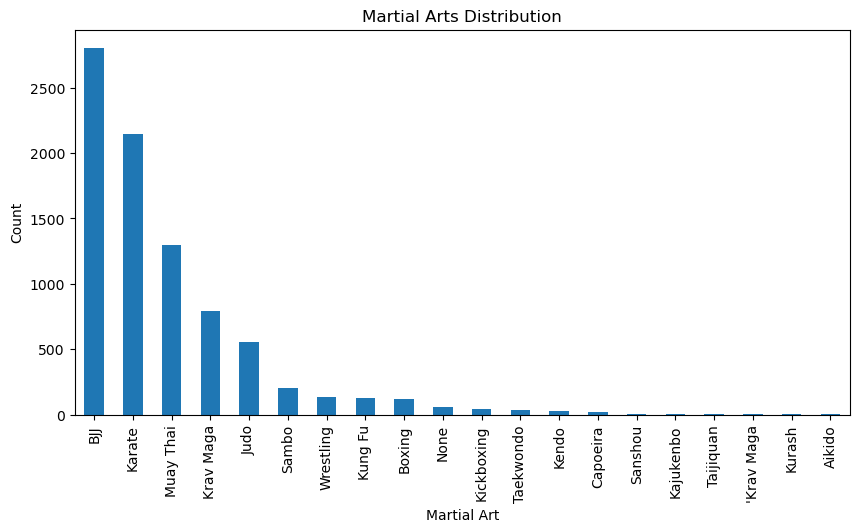

In [26]:
# viz the distribution of martial arts
fights['A_Martial_Art_1'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Martial Arts Distribution')
plt.ylabel('Count')
plt.xlabel('Martial Art')
plt.show()


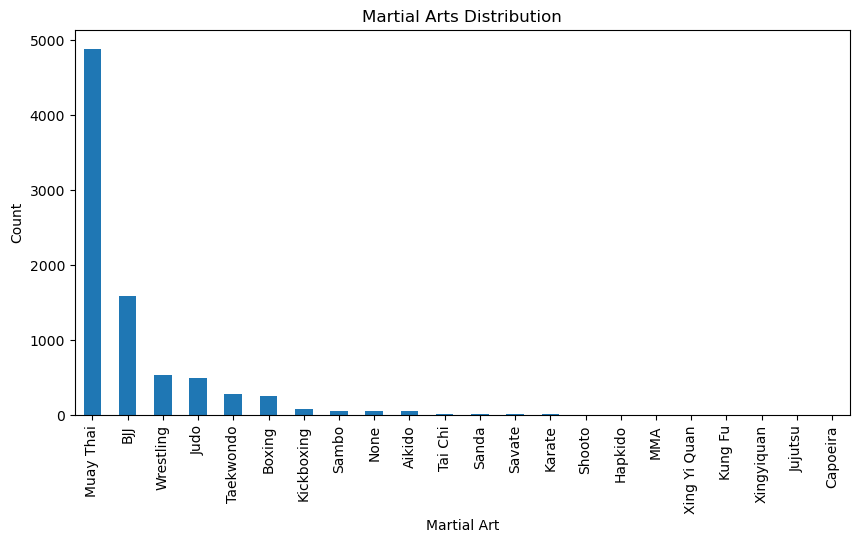

In [27]:
# viz martial_art 2
fights['A_Martial_Art_2'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Martial Arts Distribution')
plt.ylabel('Count')
plt.xlabel('Martial Art')
plt.show()


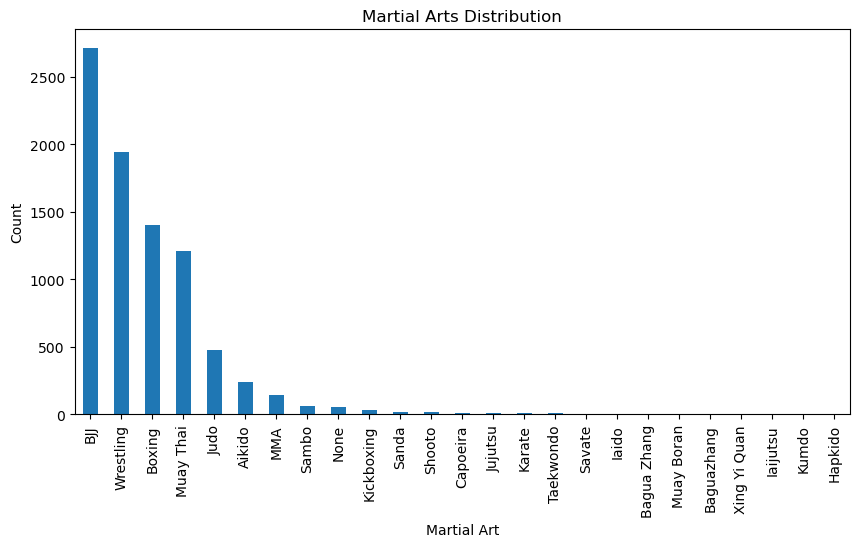

In [28]:
# viz martial_art 3
fights['A_Martial_Art_3'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Martial Arts Distribution')
plt.ylabel('Count')
plt.xlabel('Martial Art')
plt.show()

In [29]:
# The last 6 martial arts are not very common, so we will combine them into one category called 'Other'
fights.loc[fights['A_Martial_Art_1'].isin(['Sanshou', 'Kajukenbo', 'Taijiquan', "'Krav Maga", 'Kurash', 'Aikido', 'Shooto', 'Hapkido', 'Xing Yi Quan', 'Iaido', 'Bagua Zhang', 'Baguazhang', 'Kumdo', 'Xingyiquan', 'Iaijutsu', 'Muay Boran']), 'A_Martial_Art_1'] = 'Other'
fights.loc[fights['A_Martial_Art_2'].isin(['Sanshou', 'Kajukenbo', 'Taijiquan', "'Krav Maga", 'Kurash', 'Aikido', 'Shooto', 'Hapkido', 'Xing Yi Quan', 'Iaido', 'Bagua Zhang', 'Baguazhang', 'Kumdo', 'Xingyiquan', 'Iaijutsu', 'Muay Boran']), 'A_Martial_Art_2'] = 'Other'
fights.loc[fights['A_Martial_Art_3'].isin(['Sanshou', 'Kajukenbo', 'Taijiquan', "'Krav Maga", 'Kurash', 'Aikido', 'Shooto', 'Hapkido', 'Xing Yi Quan', 'Iaido', 'Bagua Zhang', 'Baguazhang', 'Kumdo', 'Xingyiquan', 'Iaijutsu', 'Muay Boran']), 'A_Martial_Art_3'] = 'Other'

In [30]:
# get all unique values from A_Martial_Art_1, A_Martial_Art_2, and A_Martial_Art_3
all_martial_arts = fights['A_Martial_Art_1'].unique()
all_martial_arts = np.append(all_martial_arts, fights['A_Martial_Art_2'].unique())
all_martial_arts = np.append(all_martial_arts, fights['A_Martial_Art_3'].unique())
all_martial_arts = np.unique(all_martial_arts)

print(len(all_martial_arts))
all_martial_arts

20


array(['BJJ', 'Boxing', 'Capoeira', 'Judo', 'Jujutsu', 'Karate', 'Kendo',
       'Kickboxing', 'Krav Maga', 'Kung Fu', 'MMA', 'Muay Thai', 'None',
       'Other', 'Sambo', 'Sanda', 'Savate', 'Taekwondo', 'Tai Chi',
       'Wrestling'], dtype=object)

Save

In [31]:
fights.to_csv('data/final/aggregates/Double_Fights_DF_V20.csv', index=False)

### How can we categorize martial arts with what we have left?

- Categorize them by Striking or Grappling

In [32]:
print(all_martial_arts)

['BJJ' 'Boxing' 'Capoeira' 'Judo' 'Jujutsu' 'Karate' 'Kendo' 'Kickboxing'
 'Krav Maga' 'Kung Fu' 'MMA' 'Muay Thai' 'None' 'Other' 'Sambo' 'Sanda'
 'Savate' 'Taekwondo' 'Tai Chi' 'Wrestling']


In [33]:
# categorize martial arts by striking, grappling, both, or none. 
striking = ['Boxing', 'Capoeira', 'Karate', 'Kendo', 'Kickboxing', 'Krav Maga', 'Kung Fu', 'Muay Thai', 'Savate', 'Other', 'Taekwondo', 'Tai Chi', 'Sanda']
grappling = ['BJJ', 'Judo', 'Wrestling', 'Jujutsu']
both = ['MMA', 'Sambo']
none = ['None']

# make a dictionary to map each martial art to its category
martial_art_dict = {}
for martial_art in all_martial_arts:
    if martial_art in striking:
        martial_art_dict[martial_art] = 'Striking'
    elif martial_art in grappling:
        martial_art_dict[martial_art] = 'Grappling'
    elif martial_art in both:
        martial_art_dict[martial_art] = 'Both'
    elif martial_art in none:
        martial_art_dict[martial_art] = 'None'
    else:
        martial_art_dict[martial_art] = 'Other'

martial_art_dict

{'BJJ': 'Grappling',
 'Boxing': 'Striking',
 'Capoeira': 'Striking',
 'Judo': 'Grappling',
 'Jujutsu': 'Grappling',
 'Karate': 'Striking',
 'Kendo': 'Striking',
 'Kickboxing': 'Striking',
 'Krav Maga': 'Striking',
 'Kung Fu': 'Striking',
 'MMA': 'Both',
 'Muay Thai': 'Striking',
 'None': 'None',
 'Other': 'Striking',
 'Sambo': 'Both',
 'Sanda': 'Striking',
 'Savate': 'Striking',
 'Taekwondo': 'Striking',
 'Tai Chi': 'Striking',
 'Wrestling': 'Grappling'}

In [34]:

# for each value in A_Martial_Art_1, A_Martial_Art_2, and A_Martial_Art_3, assign a category in a new column using dict
fights['A_Martial_Art_1_Category'] = fights['A_Martial_Art_1'].map(martial_art_dict)
fights['A_Martial_Art_2_Category'] = fights['A_Martial_Art_2'].map(martial_art_dict)
fights['A_Martial_Art_3_Category'] = fights['A_Martial_Art_3'].map(martial_art_dict)
fights['B_Martial_Art_1_Category'] = fights['B_Martial_Art_1'].map(martial_art_dict)
fights['B_Martial_Art_2_Category'] = fights['B_Martial_Art_2'].map(martial_art_dict)
fights['B_Martial_Art_3_Category'] = fights['B_Martial_Art_3'].map(martial_art_dict)

fights.head()

,Unnamed: 0,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,...,A_Fighting_Out_Of_Cluster,B_Fighting_Out_Of_Cluster,A_Previous_Promotion_Cluster,B_Previous_Promotion_Cluster,A_Martial_Art_1_Category,A_Martial_Art_2_Category,A_Martial_Art_3_Category,B_Martial_Art_1_Category,B_Martial_Art_2_Category,B_Martial_Art_3_Category
0,0,Rick Story,Martin Kampmann,0.0,0.0,61.0,170.0,38.0,147.0,0.35,...,4.0,4.0,3.0,3.0,Grappling,Striking,Grappling,Striking,Grappling,Grappling
1,1,Enrique Barzola,Kyle Bochniak,0.0,0.0,55.0,165.0,41.0,141.0,0.33,...,4.0,4.0,4.0,4.0,Striking,Striking,Grappling,Grappling,Striking,Grappling
2,2,Belal Muhammad,Takashi Sato,0.0,0.0,49.0,106.0,29.0,89.0,0.46,...,0.0,0.0,4.0,1.0,Striking,Striking,Grappling,Striking,Grappling,NaN
3,3,Alex Caceres,Edwin Figueroa,0.0,1.0,55.0,89.0,41.0,81.0,0.61,...,5.0,5.0,1.0,1.0,Striking,Grappling,Grappling,Striking,Striking,Grappling
4,4,Kenny Florian,Joe Stevenson,0.0,0.0,17.0,37.0,6.0,18.0,0.45,...,1.0,1.0,1.0,3.0,Grappling,Striking,Grappling,Grappling,Striking,Grappling


In [35]:
# new feature: first 2 martial arts 
fights['A_Initial_Martial_Arts_Cats'] = fights['A_Martial_Art_1'] + '-' + fights['A_Martial_Art_2']
fights['B_Initial_Martial_Arts_Cats'] = fights['B_Martial_Art_1'] + '-' + fights['B_Martial_Art_2']

Add Ape Index Dif, Leg Index Dif, Leg to Wing Index Dif

In [37]:
# Add Ape_Index_Dif, A_Ape_Index - B_Ape_Index
fights['Ape_Index_Dif'] = fights['A_Ape_Index'] - fights['B_Ape_Index']

# Add Leg_Index_Dif, A_Leg_Index - B_Leg_Index
fights['Leg_Index_Dif'] = fights['A_Leg_Index'] - fights['B_Leg_Index']

# Add Leg_to_Wing_Index_Dif, A_Leg_to_Wing_Index - B_Leg_to_Wing_Index
fights['Leg_to_Wing_Index_Dif'] = fights['A_Leg_to_Wing_Index'] - fights['B_Leg_to_Wing_Index']


In [39]:
cols = fights.columns.tolist()
cols

['Unnamed: 0',
 'Fighter_A',
 'Fighter_B',
 'A_Kd',
 'B_Kd',
 'A_Sig_strike_land',
 'A_Sig_strike_att',
 'B_Sig_strike_land',
 'B_Sig_strike_att',
 'A_Sig_strike_percent',
 'B_Sig_strike_percent',
 'A_Total_Strikes_land',
 'A_Total_Strikes_att',
 'B_Total_Strikes_land',
 'B_Total_Strikes_att',
 'A_Total_Strikes_percent',
 'B_Total_Strikes_percent',
 'A_Takedowns_land',
 'A_Takedowns_att',
 'B_Takedowns_land',
 'B_Takedowns_att',
 'A_Takedown_percent',
 'B_Takedown_percent',
 'A_Sub_Attempts_land',
 'A_Sub_Attempts_att',
 'B_Sub_Attempts_land',
 'B_Sub_Attempts_att',
 'A_Sub_Success_Percent',
 'B_Sub_Success_Percent',
 'A_Rev',
 'B_Rev',
 'A_Ctrl_time_min',
 'A_Ctrl_time_sec',
 'B_Ctrl_time_min',
 'B_Ctrl_time_sec',
 'A_Ctrl_time_tot',
 'B_Ctrl_time_tot',
 'details',
 'event_title',
 'event_url',
 'date',
 'Winner',
 'fight_id',
 'A_Head_Strikes_land',
 'A_Head_Strikes_att',
 'B_Head_Strikes_land',
 'B_Head_Strikes_att',
 'A_Head_Strikes_percent',
 'B_Head_Strikes_percent',
 'A_Body_Str

In [40]:
# get date_formatted column values
date_formatted = fights['date_formatted'].unique()
date_formatted

array(['2011-11-19', '2016-08-27', '2019-09-07', '2012-02-04',
       '2008-11-15', '2013-05-18', '2012-09-29', '2014-09-27',
       '2017-09-22', '2013-12-28', '2016-11-05', '2020-07-25',
       '2015-06-20', '2013-04-06', '2020-09-26', '2016-02-27',
       '2017-02-11', '2016-07-07', '2013-08-28', '2020-10-24',
       '2008-01-19', '2018-12-08', '2013-07-27', '2011-02-26',
       '2014-10-04', '2020-06-13', '2015-04-11', '2010-03-27',
       '2022-03-12', '2011-12-30', '2020-10-31', '2011-06-26',
       '2017-04-22', '2010-03-31', '2019-03-30', '2017-05-13',
       '2021-08-28', '2018-02-03', '2010-10-23', '2019-02-17',
       '2021-12-11', '2019-07-20', '2016-12-10', '2016-08-20',
       '2016-05-08', '2020-11-21', '2023-01-21', '2013-11-16',
       '2010-01-02', '2018-06-01', '2014-11-07', '2012-05-26',
       '2018-02-24', '2017-07-29', '2015-05-09', '2008-05-24',
       '2016-06-04', '2019-09-14', '2022-02-12', '2018-07-14',
       '2018-12-01', '2021-12-04', '2014-04-19', '2013-

Add Days Since Last Fight

- How do we do this? We need tapology data?

In [44]:
# Convert 'date_formatted' to datetime format if it's not already
fights['date_formatted'] = pd.to_datetime(fights['date_formatted'])

# Get last fight date
fights['A_Last_Fight_Date'] = fights.groupby('Fighter_A')['date_formatted'].shift(1)
fights['B_Last_Fight_Date'] = fights.groupby('Fighter_B')['date_formatted'].shift(1)

# Ensure the shifted dates are still in datetime format
fights['A_Last_Fight_Date'] = pd.to_datetime(fights['A_Last_Fight_Date'])
fights['B_Last_Fight_Date'] = pd.to_datetime(fights['B_Last_Fight_Date'])

# Now, the subtraction should work without errors
fights['A_Days_Since_Last_Fight'] = (fights['date_formatted'] - fights['A_Last_Fight_Date']).dt.days
fights['B_Days_Since_Last_Fight'] = (fights['date_formatted'] - fights['B_Last_Fight_Date']).dt.days

# difference in days since last fight
fights['Days_Since_Last_Fight_Dif'] = fights['A_Days_Since_Last_Fight'] - fights['B_Days_Since_Last_Fight']

In [46]:
# drop Last Fight Date columns
fights.drop(['A_Last_Fight_Date', 'B_Last_Fight_Date'], axis=1, inplace=True)

In [47]:
fights.to_csv('data/final/aggregates/Double_Fights_DF_V20.csv', index=False)

### Body Type Clustering

In [50]:
# we want all the size columns for body type clustering
size_cols = [ 'Fighter_A',
    'fight_weightclass',
    'A_Body_Length',
 'A_Body_Length_to_Height_Ratio',
 'A_Body_Length_to_Reach_Ratio',
 'A_Body_Length_to_Leg_Reach_Ratio',
  'A_Height',
 'A_Reach',
 'A_Leg_Reach',
 'A_Ape_Index',
 'A_Leg_Index',
 'A_Leg_to_Wing_Index',
]

size_df = fights[size_cols]

# drop duplicates by Fighter_A
size_df = size_df.drop_duplicates(subset=['Fighter_A'])

size_df


,Fighter_A,fight_weightclass,A_Body_Length,A_Body_Length_to_Height_Ratio,A_Body_Length_to_Reach_Ratio,A_Body_Length_to_Leg_Reach_Ratio,A_Height,A_Reach,A_Leg_Reach,A_Ape_Index,A_Leg_Index,A_Leg_to_Wing_Index
0,Rick Story,Welterweight,30.0,0.428571,0.422535,0.750000,70.0,71.0,40.0,1.014286,0.571429,0.563380
1,Enrique Barzola,Featherweight,31.0,0.462687,0.442857,0.861111,67.0,70.0,36.0,1.044776,0.537313,0.514286
2,Belal Muhammad,Welterweight,31.0,0.436620,0.430556,0.775000,71.0,72.0,40.0,1.014085,0.563380,0.555556
3,Alex Caceres,Bantamweight,29.0,0.414286,0.394558,0.707317,70.0,73.5,41.0,1.050000,0.585714,0.557823
4,Kenny Florian,Lightweight,30.0,0.428571,0.405405,0.750000,70.0,74.0,40.0,1.057143,0.571429,0.540541
...,...,...,...,...,...,...,...,...,...,...,...,...
8329,Xavier Foupa-Pokam,Middleweight,31.5,0.431507,0.420000,0.759036,73.0,75.0,41.5,1.027397,0.568493,0.553333
8343,Danilo Belluardo,Lightweight,33.0,0.458333,0.442953,0.846154,72.0,74.5,39.0,1.034722,0.541667,0.523490
8355,Liudvik Sholinian,Bantamweight,32.0,0.457143,0.450704,0.842105,70.0,71.0,38.0,1.014286,0.542857,0.535211
8359,Steven Koslow,Bantamweight,28.5,0.422222,0.413043,0.730769,67.5,69.0,39.0,1.022222,0.577778,0.565217


In [53]:
# drop fighter_A column
size_df_cluster = size_df.drop(['Fighter_A'], axis=1)

size_df_cluster

,fight_weightclass,A_Body_Length,A_Body_Length_to_Height_Ratio,A_Body_Length_to_Reach_Ratio,A_Body_Length_to_Leg_Reach_Ratio,A_Height,A_Reach,A_Leg_Reach,A_Ape_Index,A_Leg_Index,A_Leg_to_Wing_Index
0,Welterweight,30.0,0.428571,0.422535,0.750000,70.0,71.0,40.0,1.014286,0.571429,0.563380
1,Featherweight,31.0,0.462687,0.442857,0.861111,67.0,70.0,36.0,1.044776,0.537313,0.514286
2,Welterweight,31.0,0.436620,0.430556,0.775000,71.0,72.0,40.0,1.014085,0.563380,0.555556
3,Bantamweight,29.0,0.414286,0.394558,0.707317,70.0,73.5,41.0,1.050000,0.585714,0.557823
4,Lightweight,30.0,0.428571,0.405405,0.750000,70.0,74.0,40.0,1.057143,0.571429,0.540541
...,...,...,...,...,...,...,...,...,...,...,...
8329,Middleweight,31.5,0.431507,0.420000,0.759036,73.0,75.0,41.5,1.027397,0.568493,0.553333
8343,Lightweight,33.0,0.458333,0.442953,0.846154,72.0,74.5,39.0,1.034722,0.541667,0.523490
8355,Bantamweight,32.0,0.457143,0.450704,0.842105,70.0,71.0,38.0,1.014286,0.542857,0.535211
8359,Bantamweight,28.5,0.422222,0.413043,0.730769,67.5,69.0,39.0,1.022222,0.577778,0.565217


In [57]:
welterweight_cluster = size_df_cluster[size_df_cluster['fight_weightclass'] == 'Welterweight']
# drop fight_weightclass column
welterweight_cluster = welterweight_cluster.drop(['fight_weightclass'], axis=1)

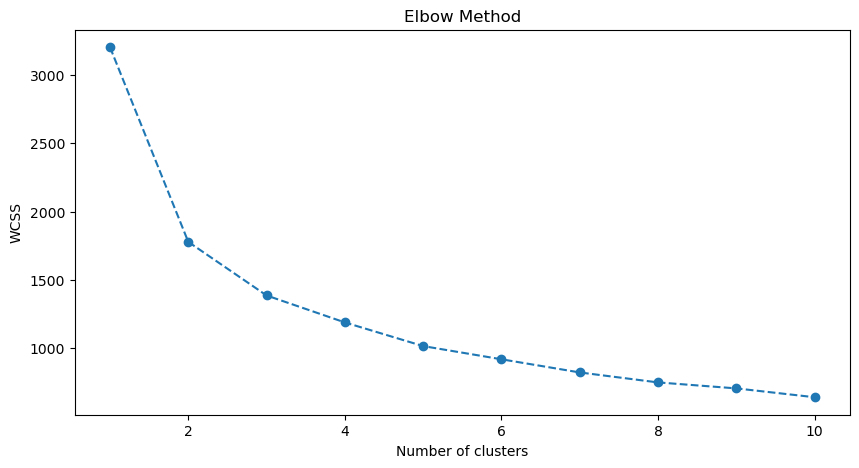

In [58]:


wcss = []  # Within-Cluster-Sum-of-Squares 
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(welterweight_cluster)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Apply k-means
optimal_clusters = 5  # Assuming 3 was the elbow point, adjust this based on your plot
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(df_cluster)

Apply t-SNE

In [68]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [69]:
scaled_data = StandardScaler().fit_transform(welterweight_cluster)

In [70]:
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
tsne_results = tsne.fit_transform(scaled_data)

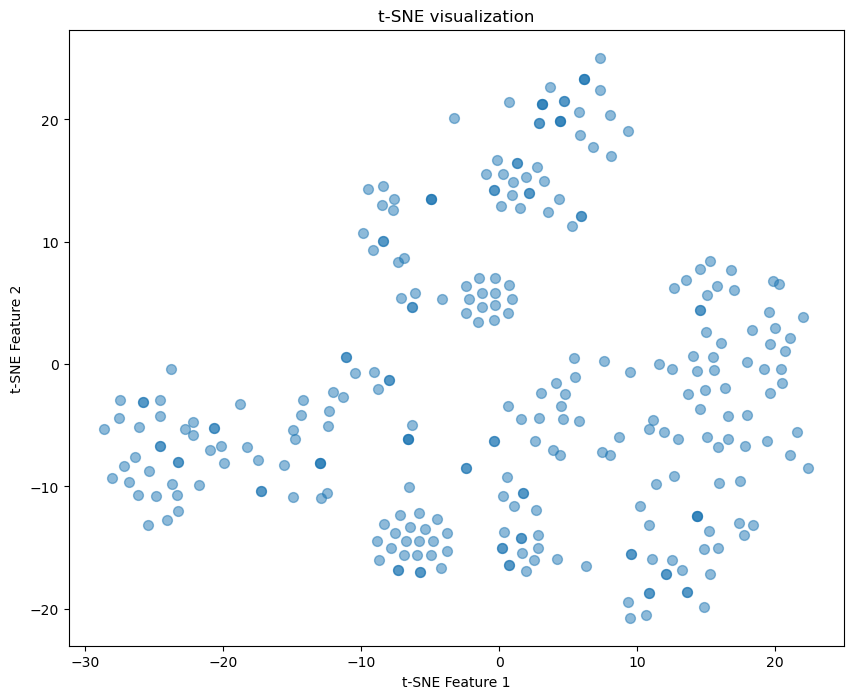

In [71]:
plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], s=50, alpha=0.5)
plt.title('t-SNE visualization')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()

## Apply PCA

In [64]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaled_data = StandardScaler().fit_transform(welterweight_cluster)

In [65]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(scaled_data)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PCA_1', 'PCA_2', 'PCA_3'])
principalDf

,PCA_1,PCA_2,PCA_3
0,0.386132,1.468693,-0.998836
1,1.584958,0.489107,-0.592497
2,1.405804,0.300112,0.368782
3,-5.796068,2.122362,0.233443
4,0.119105,0.169948,0.999807
...,...,...,...
286,0.376969,-0.560633,0.115717
287,0.376969,-0.560633,0.115717
288,0.120436,2.201119,-0.094268
289,0.376969,-0.560633,0.115717


In [67]:
explained_variance = pca.explained_variance_ratio_
explained_variance


array([0.5632924 , 0.24045391, 0.19588946])